In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
training_data = np.array([
    [1.2, 3.7, 1],
    [2.3, 4.2, 1],
    [3.1, 5.0, 1],
    [4.4, 1.8, -1],
    [5.5, 2.4, -1],
    [5.7, 1.9, -1],
])

In [4]:
inputs = training_data[:, :2]
targets = training_data[:, 2:]

In [5]:
def perceptron(inputs, targets, learning_rate, num_epochs):
    num_inputs = inputs.shape[1]
    num_outputs = targets.shape[1]

    weights = np.random.randn(num_inputs, num_outputs)
    bias = np.random.randn(num_outputs)

    for epoch in range(num_epochs):
        for input_, target in zip(inputs, targets):
            output = np.dot(input_, weights) + bias
            error = target - output

            weights += learning_rate * np.outer(input_, error)
            bias += learning_rate * error
    
    return weights, bias

In [6]:
weights, bias = perceptron(inputs, targets, learning_rate=0.1, num_epochs=100)

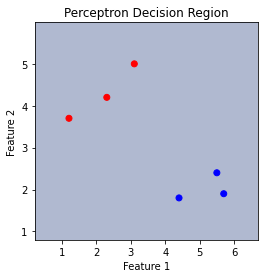

In [7]:
x_min, x_max = inputs[:, 0].min() - 1, inputs[:, 0].max() + 1
y_min, y_max = inputs[:, 1].min() - 1, inputs[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(4, 4))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0], cmap=plt.cm.bwr)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Region')
plt.show()